## Lista de Exercícios 7
### 1. Utilizando o Apache Spark e demais ferramentas correlatas:
#### a. Defina um grafo direcionado de pelo menos 10 vértices. O grafo deve representar uma situação do mundo real, sendo que os dados podem ser extraídos de alguma fonte ou artificialmente criados.
#### b. Calcule o número de triângulos no grafo.
#### c. Calcule o coeficiente de clustering local dos três vértices com maior grau.
#### d. Determine os compoentens fortemente conectados e os componentes conectados. O quão eles diferem entre si?
#### e. Determine os clusters do grafo a partir da execução do algoritmo de propagação de rótulos.

In [1]:
pip install spark

     |████████████████████████████████| 41 kB 140 kB/s eta 0:00:01
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58738 sha256=3a196a5398398becfa45fcb6ead157039e45ebe02572ab8d0244e2835cebb823
  Stored in directory: /home/jovyan/.cache/pip/wheels/4e/0e/f1/164619f9920fb447d294afaae11a7715bd442ded7225953d72
Successfully built spark
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyspark

     |████████████████████████████████| 197 kB 581 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install graphframes

Note: you may need to restart the kernel to use updated packages.


In [40]:
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import networkx as nx
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
from graphframes import *

config = SparkConf().setAppName('appName').setMaster('local')
sctext = SparkContext.getOrCreate(config)
spark = SparkSession(sctext)

In [30]:
data = pd.read_csv('relationship_networkX.csv')
No = spark.read.csv('transport-nodes.csv', header=True)
relation = spark.read.csv('transport-relationships.csv', header=True)

In [31]:
Graphtype = nx.DiGraph()

In [22]:
graph_nx = nx.from_pandas_edgelist(data, edge_attr = 'cost', create_using = Graphtype)

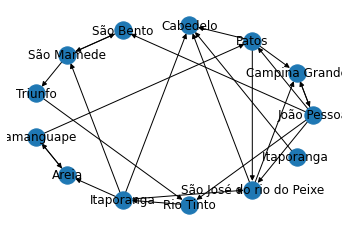

In [53]:
# O única número de subplot que eu consegui fazer "plotar" foi 111.

plt.subplot(111)
nx.draw_shell(graph_nx, nlist = [graph_nx.nodes], with_labels=True)

In [54]:
#Calcule o número de triângulos no grafo.

tri_graph = [way for way in nx.simple_cycles(graph_nx) if len(way) == 3]

print('Triangulos:', tri_graph)

Triangulos: [['Patos', 'Campina Grande', 'João Pessoa'], ['João Pessoa', 'São José do rio do Peixe', 'Campina Grande']]


In [57]:
graph_nx.degree(graph_nx.nodes)

DiDegreeView({'João Pessoa': 6, 'Campina Grande': 4, 'Patos': 5, 'Cabedelo': 4, 'São Bento': 3, 'São Mamede': 4, 'Triunfo': 2, 'Mamanguape': 3, 'Areia': 3, 'Itaporanga': 5, 'Rio Tinto': 3, 'São José do rio do Peixe': 5, 'Itaporanga ': 1})

### Aqui nós vimos que os três vértices com maior grau, são:
##### João pessoa, Patos, Itaporanga / São José do rio do Peixe

In [58]:
# Calcule o coeficiente de clustering local dos três vértices com maior grau.

# Escolhi entre Itaporanga e São José do rio do peixe para fazer o cálculo do coeficiente
# Mas a nível de curiosidade o Coeficiente de clustering de 'Itaporanga', foi 0.05

print('Coeficiente:', nx.clustering(graph_nx, 'João Pessoa'))
print('Coeficiente:', nx.clustering(graph_nx, 'Patos'))
print('Coeficiente:', nx.clustering(graph_nx, 'São José do rio do Peixe'))

Coeficiente: 0.17857142857142858
Coeficiente: 0.25
Coeficiente: 0.3


In [59]:
# Determine os componentes fortemente conectados

print([conx for conx in nx.strongly_connected_components(graph_nx)])

[{'Cabedelo'}, {'Itaporanga', 'Areia', 'Patos', 'João Pessoa', 'São Mamede', 'São José do rio do Peixe', 'Campina Grande', 'Rio Tinto', 'Mamanguape', 'Triunfo', 'São Bento'}, {'Itaporanga '}]


In [60]:
graph = GraphFrame(No, relation)

In [61]:
# Determine os clusters do grafo a partir da execução do algoritmo de propagação de rótulos.

labl_propa = graph.labelPropagation(maxIter = 50)
labl_propa.select("id", "label").show()

+--------------------+-------------+
|                  id|        label|
+--------------------+-------------+
|             Triunfo| 111669149696|
|São José do rio d...|1185410973696|
|          Mamanguape|1185410973696|
|            Cabedelo|1185410973696|
|          Itaporanga|1185410973696|
|          São Mamede| 180388626432|
|         João Pessoa|1185410973696|
|           Rio Tinto| 180388626432|
|               Patos|1185410973696|
|               Areia|  34359738368|
|      Campina Grande|1185410973696|
|           São Bento| 111669149696|
+--------------------+-------------+

